In [4]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import glob
import math

import yfinance as yf

%matplotlib inline

## Import tensorflow
import tensorflow as tf
from tensorflow.keras.utils import plot_model

print("Running TensorFlow version ",tf.__version__)

# Parse tensorflow version
import re
version_match = re.match("([0-9]+)\.([0-9]+)", tf.__version__)
tf_major, tf_minor = int(version_match.group(1)) , int(version_match.group(2))
print("Version {v:d}, minor {m:d}".format(v=tf_major, m=tf_minor) )

Running TensorFlow version  2.7.0
Version 2, minor 7


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%reload_ext autoreload
%autoreload 1

In [39]:
# get price
start = '2017-01-03'
dataX = yf.download('AAPL', start)
dataX = dataX.reset_index(level=0)
dataX['Return'] = dataX['Close'].pct_change()
dataX.dropna(inplace=True) # Drop N/A
dataX = dataX[::-1] # Reverse Order 
dataX = dataX.reset_index(drop=True) # Reset Index

dataX

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2022-07-01,136.039993,139.039993,135.660004,138.929993,138.929993,71007500,0.016164
1,2022-06-30,137.250000,138.369995,133.770004,136.720001,136.720001,98964500,-0.018028
2,2022-06-29,137.460007,140.669998,136.669998,139.229996,139.229996,66242400,0.013024
3,2022-06-28,142.130005,143.419998,137.320007,137.440002,137.440002,67083400,-0.029790
4,2022-06-27,142.699997,143.490005,140.970001,141.660004,141.660004,70207900,0.000000
...,...,...,...,...,...,...,...,...
1378,2017-01-10,29.692499,29.844999,29.575001,29.777500,28.111979,97848400,0.001009
1379,2017-01-09,29.487499,29.857500,29.485001,29.747499,28.083660,134247600,0.009159
1380,2017-01-06,29.195000,29.540001,29.117500,29.477501,27.828764,127007600,0.011148
1381,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.521944,88774400,0.005085


In [40]:
dataX.head(500)

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2022-07-01,136.039993,139.039993,135.660004,138.929993,138.929993,71007500,0.016164
1,2022-06-30,137.250000,138.369995,133.770004,136.720001,136.720001,98964500,-0.018028
2,2022-06-29,137.460007,140.669998,136.669998,139.229996,139.229996,66242400,0.013024
3,2022-06-28,142.130005,143.419998,137.320007,137.440002,137.440002,67083400,-0.029790
4,2022-06-27,142.699997,143.490005,140.970001,141.660004,141.660004,70207900,0.000000
...,...,...,...,...,...,...,...,...
495,2020-07-15,98.989998,99.247498,96.489998,97.724998,97.070930,153198000,0.006877
496,2020-07-14,94.839996,97.254997,93.877502,97.057503,96.407898,170989200,0.016548
497,2020-07-13,97.264999,99.955002,95.257500,95.477501,94.838470,191649200,-0.004613
498,2020-07-10,95.334999,95.980003,94.705002,95.919998,95.278015,90257200,0.001749


In [41]:
# create train test partition
df = dataX.set_index(dataX['Date'])
df = df.sort_index()
analysis = df['2017-01-04':'2020-07-09'].reset_index(drop=True)
holdout  = df['2020-07-10':].reset_index(drop=True)
print('Train Dataset:',analysis.shape)
print('Test Dataset:',holdout.shape)

Train Dataset: (884, 8)
Test Dataset: (499, 8)


In [42]:
dataX = analysis
dataX = dataX[::-1] # Reverse Order 
dataX = dataX.reset_index(drop=True) # Reset Index
dataX

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2020-07-09,96.262497,96.317497,94.672501,95.752502,95.111641,125642800,0.004300
1,2020-07-08,94.180000,95.375000,94.089996,95.342499,94.704369,117092000,0.023290
2,2020-07-07,93.852501,94.654999,93.057503,93.172501,92.548889,112424400,-0.003103
3,2020-07-06,92.500000,93.945000,92.467499,93.462502,92.836960,118655600,0.026750
4,2020-07-02,91.962502,92.617500,90.910004,91.027496,90.418251,114041600,0.000000
...,...,...,...,...,...,...,...,...
879,2017-01-10,29.692499,29.844999,29.575001,29.777500,28.111979,97848400,0.001009
880,2017-01-09,29.487499,29.857500,29.485001,29.747499,28.083660,134247600,0.009159
881,2017-01-06,29.195000,29.540001,29.117500,29.477501,27.828764,127007600,0.011148
882,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.521944,88774400,0.005085


In [43]:
dataX['Date'] = dataX['Date'].apply(pd.to_datetime, errors='coerce')
dataX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       884 non-null    datetime64[ns]
 1   Open       884 non-null    float64       
 2   High       884 non-null    float64       
 3   Low        884 non-null    float64       
 4   Close      884 non-null    float64       
 5   Adj Close  884 non-null    float64       
 6   Volume     884 non-null    int64         
 7   Return     884 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 55.4 KB


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

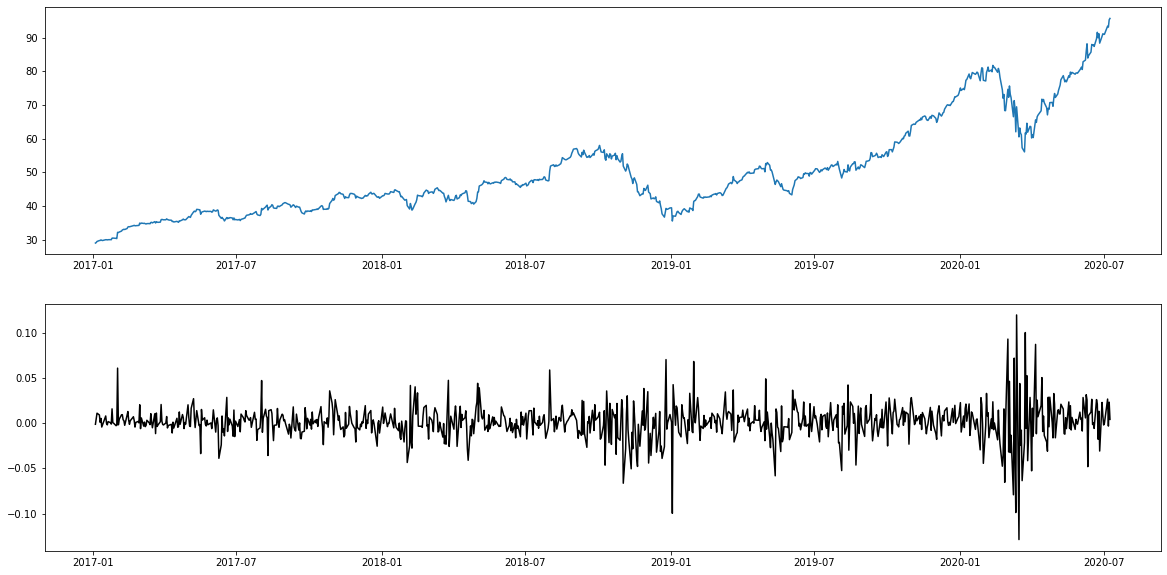

In [44]:
plt.figure(figsize=(20,10))
plt.subplot(211)

plt.plot(dataX['Date'], dataX['Close'], color='tab:blue')

plt.subplot(212)
plt.plot(dataX['Date'], dataX['Return'], color='black')
plt.show()

In [45]:
# Add "augRange"-1 numbers of previous data (from t-1 ~ t-augRange-1) to the row t

def dataAugment(augRange, df):
    data_final = None

    for i in range(augRange, len(df)):
        dataC = None
    
        for j in range(i-augRange, i):
            dataC = pd.concat([dataC, df.iloc[j]], axis=0)
    
        data_final = pd.concat([data_final, dataC.transpose()], axis=1)
    
    data_final = data_final.transpose().reset_index(drop=True)

    return data_final

In [46]:
datatest = dataAugment(20, dataX[['Close']])

datatest

,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
0,95.752502,95.342499,93.172501,93.462502,91.027496,91.027496,91.199997,90.445000,88.407501,91.209999,90.014999,91.632500,89.717499,87.430000,87.932503,87.897499,88.019997,85.747498,84.699997,83.974998
1,95.342499,93.172501,93.462502,91.027496,91.027496,91.199997,90.445000,88.407501,91.209999,90.014999,91.632500,89.717499,87.430000,87.932503,87.897499,88.019997,85.747498,84.699997,83.974998,88.209999
2,93.172501,93.462502,91.027496,91.027496,91.199997,90.445000,88.407501,91.209999,90.014999,91.632500,89.717499,87.430000,87.932503,87.897499,88.019997,85.747498,84.699997,83.974998,88.209999,85.997498
3,93.462502,91.027496,91.027496,91.199997,90.445000,88.407501,91.209999,90.014999,91.632500,89.717499,87.430000,87.932503,87.897499,88.019997,85.747498,84.699997,83.974998,88.209999,85.997498,83.364998
4,91.027496,91.027496,91.199997,90.445000,88.407501,91.209999,90.014999,91.632500,89.717499,87.430000,87.932503,87.897499,88.019997,85.747498,84.699997,83.974998,88.209999,85.997498,83.364998,82.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,33.009998,32.882500,32.572498,32.270000,32.132500,32.187500,30.337500,30.407499,30.487499,30.485001,30.469999,29.992500,30.020000,30.000000,29.945000,29.997499,30.000000,29.760000,29.812500,29.937500
860,32.882500,32.572498,32.270000,32.132500,32.187500,30.337500,30.407499,30.487499,30.485001,30.469999,29.992500,30.020000,30.000000,29.945000,29.997499,30.000000,29.760000,29.812500,29.937500,29.777500
861,32.572498,32.270000,32.132500,32.187500,30.337500,30.407499,30.487499,30.485001,30.469999,29.992500,30.020000,30.000000,29.945000,29.997499,30.000000,29.760000,29.812500,29.937500,29.777500,29.747499
862,32.270000,32.132500,32.187500,30.337500,30.407499,30.487499,30.485001,30.469999,29.992500,30.020000,30.000000,29.945000,29.997499,30.000000,29.760000,29.812500,29.937500,29.777500,29.747499,29.477501


In [47]:
X = datatest.iloc[1: , :] # drop first row
X = X[::-1] # Reverse Order 
X = X.reset_index(drop=True) # Reset Index
X

,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
0,32.132500,32.187500,30.337500,30.407499,30.487499,30.485001,30.469999,29.992500,30.020000,30.000000,29.945000,29.997499,30.000000,29.760000,29.812500,29.937500,29.777500,29.747499,29.477501,29.152500
1,32.270000,32.132500,32.187500,30.337500,30.407499,30.487499,30.485001,30.469999,29.992500,30.020000,30.000000,29.945000,29.997499,30.000000,29.760000,29.812500,29.937500,29.777500,29.747499,29.477501
2,32.572498,32.270000,32.132500,32.187500,30.337500,30.407499,30.487499,30.485001,30.469999,29.992500,30.020000,30.000000,29.945000,29.997499,30.000000,29.760000,29.812500,29.937500,29.777500,29.747499
3,32.882500,32.572498,32.270000,32.132500,32.187500,30.337500,30.407499,30.487499,30.485001,30.469999,29.992500,30.020000,30.000000,29.945000,29.997499,30.000000,29.760000,29.812500,29.937500,29.777500
4,33.009998,32.882500,32.572498,32.270000,32.132500,32.187500,30.337500,30.407499,30.487499,30.485001,30.469999,29.992500,30.020000,30.000000,29.945000,29.997499,30.000000,29.760000,29.812500,29.937500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,91.027496,91.199997,90.445000,88.407501,91.209999,90.014999,91.632500,89.717499,87.430000,87.932503,87.897499,88.019997,85.747498,84.699997,83.974998,88.209999,85.997498,83.364998,82.875000,80.580002
859,91.027496,91.027496,91.199997,90.445000,88.407501,91.209999,90.014999,91.632500,89.717499,87.430000,87.932503,87.897499,88.019997,85.747498,84.699997,83.974998,88.209999,85.997498,83.364998,82.875000
860,93.462502,91.027496,91.027496,91.199997,90.445000,88.407501,91.209999,90.014999,91.632500,89.717499,87.430000,87.932503,87.897499,88.019997,85.747498,84.699997,83.974998,88.209999,85.997498,83.364998
861,93.172501,93.462502,91.027496,91.027496,91.199997,90.445000,88.407501,91.209999,90.014999,91.632500,89.717499,87.430000,87.932503,87.897499,88.019997,85.747498,84.699997,83.974998,88.209999,85.997498


In [48]:
y = dataX['Close'][:len(X)]
y

0      95.752502
1      95.342499
2      93.172501
3      93.462502
4      91.027496
         ...    
858    33.105000
859    33.009998
860    32.882500
861    32.572498
862    32.270000
Name: Close, Length: 863, dtype: float64

In [49]:
# Split data into train and test
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)
X_traint, X_testt, y_traint, y_testt = train_test_split(X_train, y_train, test_size=0.20, shuffle=False)

In [50]:
def trainModel(model, modelName):
    max_epochs = 10

    _ = model.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.RootMeanSquaredError()],
                      optimizer='adam')

    history = model.fit(X_traint, y_traint,
                          epochs=max_epochs,
                          validation_data=(X_testt, y_testt))
    
    #plot
    model_history = pd.DataFrame(history.history)
    model_history['epoch'] = history.epoch

    fig, ax = plt.subplots(1, figsize=(8,6))
    num_epochs = model_history.shape[0]

    ax.plot(np.arange(0, num_epochs), model_history["root_mean_squared_error"], 
        label="Training RSME", color='tab:blue')
    ax.plot(np.arange(0, num_epochs), model_history["val_root_mean_squared_error"], 
        label="Validation RSME", color='black')
    ax.legend()

    plt.tight_layout()
    plt.show()
    
def testModel(model, modelName):
    score = []
    score = model.evaluate(X_test, y_test)

    print("{n:s}: Test MSE: {l:3.4f} / Test RSME: {a:3.4f}".format(n=modelName, l=score[0], a=score[1]))
    
    #plot
    test_predictions = model.predict(X_test)
    test_labels = y_test

    fig, ax = plt.subplots(1, figsize=(8,6))

    ax.plot(np.arange(0, len(test_labels)), test_labels, 
            label="Target", color='tab:blue' )
    ax.plot(np.arange(0, len(test_labels)), test_predictions, 
            label="Prediction", color='black')
    ax.legend()

    plt.tight_layout()
    plt.show()
    
    return score

In [51]:
# Set model0 equal to a Keras Sequential model
input_shape = X.shape[1]
model = keras.Sequential([layers.Dense(64, activation='relu', input_dim=input_shape),
                           layers.Dense(32, activation='relu'),
                           layers.Dense(1, activation='selu', name='dense_head') #elu
                          ])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1344      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_head (Dense)          (None, 1)                 33        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
18/18 [==============================] - 1s 8ms/step - loss: 404.7852 - root_mean_squared_error: 20.1193 - val_loss: 711.1113 - val_root_mean_squared_error: 26.6667
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 391.7117 - root_mean_squared_error: 19.7917 - val_loss: 323.0523 - val_root_mean_squared_error: 17.9737
Epoch 3/10
18/18 [==============================] - 0s 2ms/step - loss: 394.0703 - root_mean_squared_error: 19.8512 - val_loss: 490.8561 - val_root_mean_squared_error: 22.1553
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 395.3082 - root_mean_squared_error: 19.8824 - val_loss: 477.3674 - val_root_mean_squared_error: 21.8487
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 388.0619 - root_mean_squared_error: 19.6993 - val_loss: 576.9805 - val_root_mean_squared_error: 24.0204
Epoch 6/10
18/18 [==============================] - 0s 2ms/step - loss: 381.6739 - root_mean_squared_error: 19.5365 - va

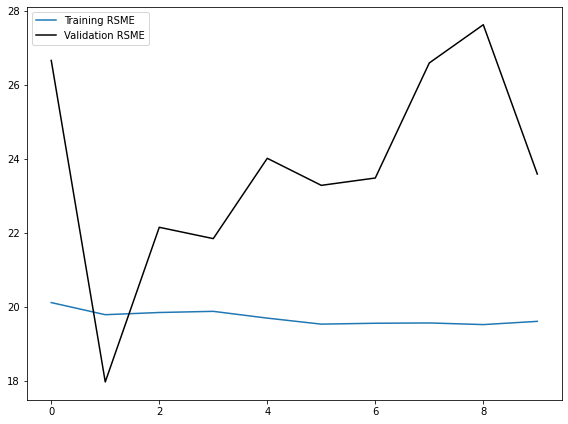

In [54]:
# train the model
model_name = "NN"
history = trainModel(model, model_name)

6/6 [==============================] - 0s 1ms/step - loss: 3202.6113 - root_mean_squared_error: 56.5916
NN: Test MSE: 3202.6113 / Test RSME: 56.5916


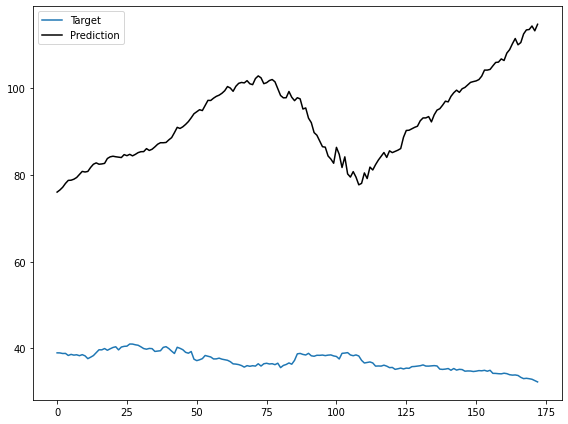

In [55]:
# evaluate the model
score = testModel(model, model_name)